1. Implement a simple linear regression model in PyTorch
   - Create a custom nn.Module class for a linear regression model with one input feature and one output
   - Generate some synthetic data (e.g. y = 2x + 3 + noise) and convert to PyTorch tensors
   - Train the model using gradient descent by manually computing the loss and calling loss.backward() and optimizer.step()
   - Plot the model's predictions against the true values
   - 

Epoch [10/300], Loss: 17.6102
Epoch [20/300], Loss: 12.9102
Epoch [30/300], Loss: 10.8328
Epoch [40/300], Loss: 9.9147
Epoch [50/300], Loss: 9.5089
Epoch [60/300], Loss: 9.3295
Epoch [70/300], Loss: 9.2503
Epoch [80/300], Loss: 9.2152
Epoch [90/300], Loss: 9.1997
Epoch [100/300], Loss: 9.1929
Epoch [110/300], Loss: 9.1899
Epoch [120/300], Loss: 9.1885
Epoch [130/300], Loss: 9.1879
Epoch [140/300], Loss: 9.1877
Epoch [150/300], Loss: 9.1876
Epoch [160/300], Loss: 9.1875
Epoch [170/300], Loss: 9.1875
Epoch [180/300], Loss: 9.1875
Epoch [190/300], Loss: 9.1875
Epoch [200/300], Loss: 9.1875
Epoch [210/300], Loss: 9.1875
Epoch [220/300], Loss: 9.1875
Epoch [230/300], Loss: 9.1875
Epoch [240/300], Loss: 9.1875
Epoch [250/300], Loss: 9.1875
Epoch [260/300], Loss: 9.1875
Epoch [270/300], Loss: 9.1875
Epoch [280/300], Loss: 9.1875
Epoch [290/300], Loss: 9.1875
Epoch [300/300], Loss: 9.1875


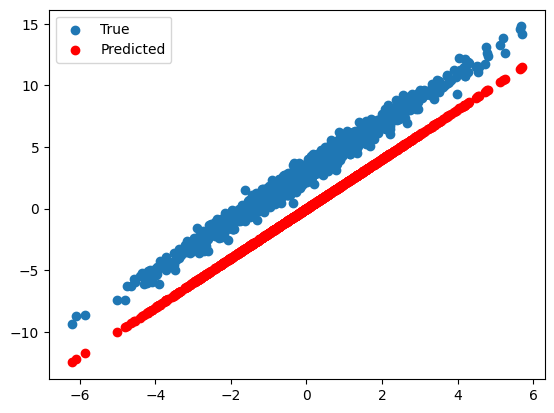

In [22]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Define the linear regression model
class LinearRegression(nn.Module):
    def __init__(self):
        super(LinearRegression, self).__init__()
        # self.linear = nn.Linear(1, 1)  # One input feature and one output
        # make it good for exponential function
        self.linear = nn.Linear(1, 1, bias=False)  # One input feature and one output
        # in equations terms this woudl be y = w*x
        # now add a non-linearity
        self.non_linearity = nn.ReLU()
        # add a sigmoid
        # self.non_linearity = nn.Sigmoid()
        


    def forward(self, x):
        return self.linear(x)
        # return self.non_linearity(self.linear(x))
        
        
        
        

# Generate synthetic data
n_points = 1000
x = torch.randn(n_points, 1) * 2  # Input features
y = 2 * x + 3 + torch.randn(n_points, 1) * 0.5  # Output with noise

# Create model and optimizer
model = LinearRegression()
optimizer = optim.SGD(model.parameters(), lr=0.005)

# Training loop
num_epochs = 300
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(x)
    loss = nn.MSELoss()(outputs, y)
    # try with nn.L1Loss() or nn.SmoothL1Loss()

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

# Plot predictions vs true values
predicted = model(x).detach().numpy()
plt.scatter(x.numpy(), y.numpy(), label='True')
plt.scatter(x.numpy(), predicted, color='red', label='Predicted')
plt.legend()
plt.show()

2. Build a multi-layer perceptron (MLP) for classification
   - Create an nn.Module class that defines an MLP architecture with configurable hidden layer sizes
   - Load a classification dataset (e.g. MNIST handwritten digits) using PyTorch's datasets and DataLoader
   - Define a training loop that performs forward pass, computes cross-entropy loss, performs backpropagation, and updates weights
   - Evaluate the trained model on a test set and report accuracy


100%|██████████| 9912422/9912422 [00:00<00:00, 13446511.05it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 63554928.55it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 13821941.57it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw




100%|██████████| 4542/4542 [00:00<00:00, 15167618.45it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



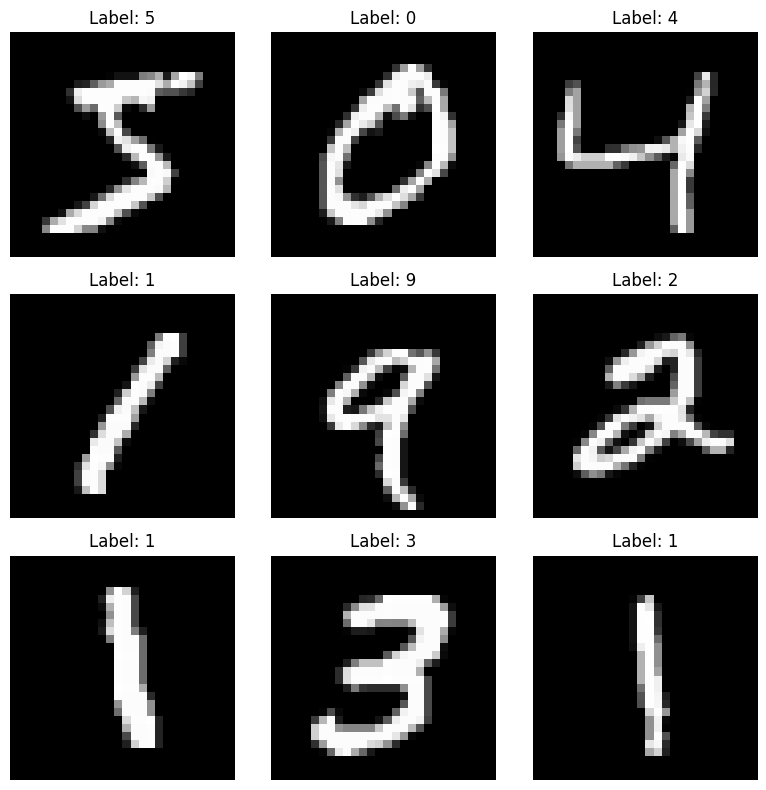

In [23]:
import matplotlib.pyplot as plt
import torchvision

# Load MNIST dataset
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=torchvision.transforms.ToTensor(), download=True)

# Plot the first 9 images
fig, axes = plt.subplots(3, 3, figsize=(8, 8))
for i, ax in enumerate(axes.flat):
    image, label = train_dataset[i]
    ax.imshow(image.squeeze(), cmap='gray')
    ax.set_title(f"Label: {label}")
    ax.axis('off')

plt.tight_layout()
plt.show()


Activation: ReLU, Test Accuracy: 97.60%


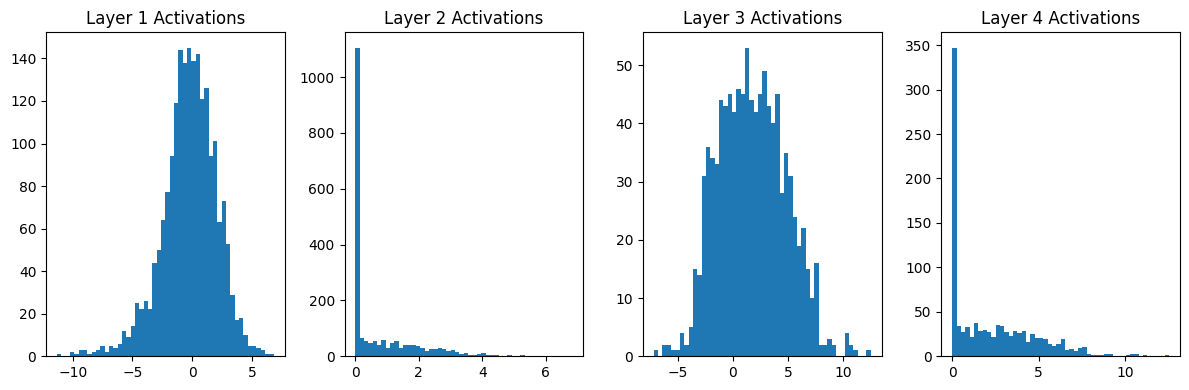

Activation: Tanh, Test Accuracy: 97.49%


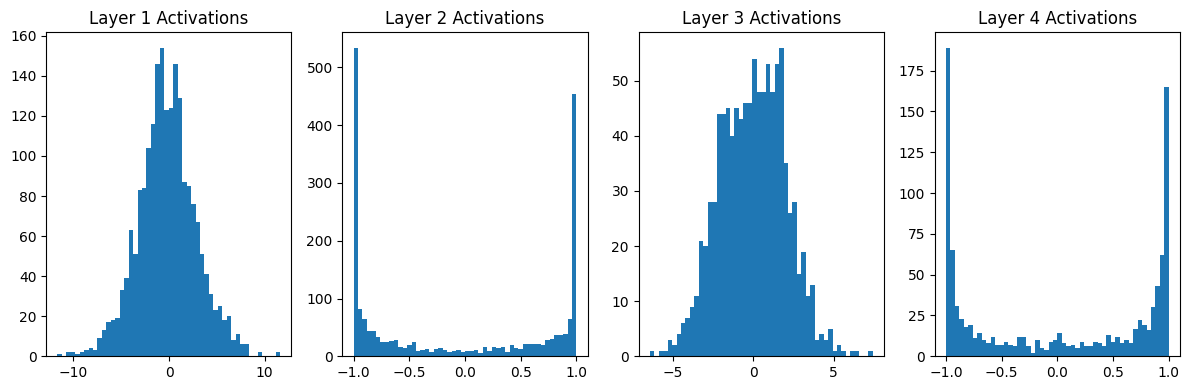

Activation: Sigmoid, Test Accuracy: 96.90%


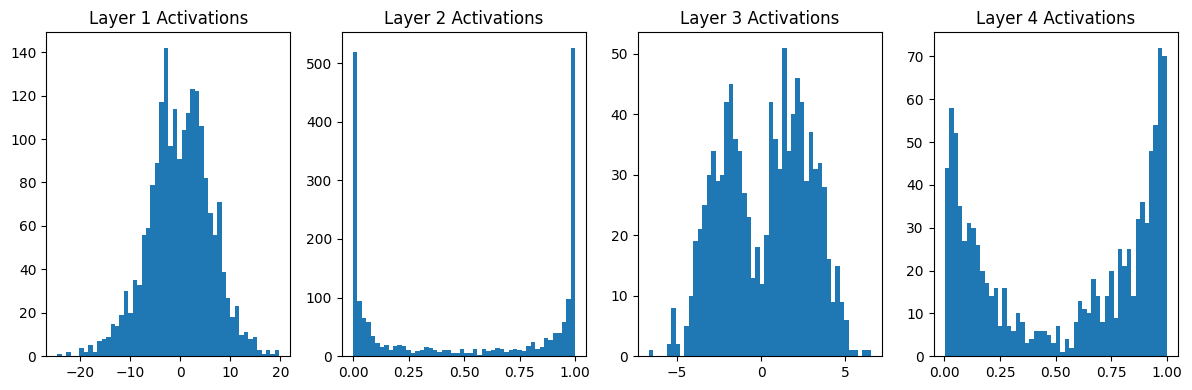

In [24]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

# Define the MLP model with configurable activation function
class MLP(nn.Module):
    def __init__(self, hidden_sizes, activation):
        super(MLP, self).__init__()
        self.hidden_layers = nn.ModuleList()
        input_size = 784  # 28x28 flattened MNIST images
        for hidden_size in hidden_sizes:
            self.hidden_layers.append(nn.Linear(input_size, hidden_size))
            self.hidden_layers.append(activation)
            input_size = hidden_size
        self.output_layer = nn.Linear(input_size, 10)  # 10 classes for MNIST

    def forward(self, x):
        x = x.view(x.size(0), -1)  # Flatten the input
        activations = []
        for layer in self.hidden_layers:
            x = layer(x)
            activations.append(x)
        output = self.output_layer(x)
        return output, activations

# Load MNIST dataset
train_dataset = datasets.MNIST(root='./data', train=True, transform=transforms.ToTensor(), download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transforms.ToTensor())
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)

# Define activation functions to compare
activations_func = [nn.ReLU(), nn.Tanh(), nn.Sigmoid()]

# Train and evaluate models with different activation functions
for activation in activations_func:
    model = MLP(hidden_sizes=[128, 64], activation=activation)
    optimizer = optim.Adam(model.parameters())

    # Training loop
    num_epochs = 5
    for epoch in range(num_epochs):
        for images, labels in train_loader:
            # Forward pass
            outputs, _ = model(images)
            loss = nn.CrossEntropyLoss()(outputs, labels)

            # Backward pass and optimization
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

    # Evaluate on test set
    model.eval()
    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in test_loader:
            outputs, activations = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        accuracy = 100 * correct / total
        print(f"Activation: {activation.__class__.__name__}, Test Accuracy: {accuracy:.2f}%")

    # Visualize activations
    plt.figure(figsize=(12, 4))
    for i, activation in enumerate(activations):
        plt.subplot(1, len(activations), i+1)
        plt.hist(activation.view(-1).numpy(), bins=50)
        plt.title(f"Layer {i+1} Activations")
    plt.tight_layout()
    plt.show()
    
    


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 2 dimensions. The detected shape was (4, 16) + inhomogeneous part.

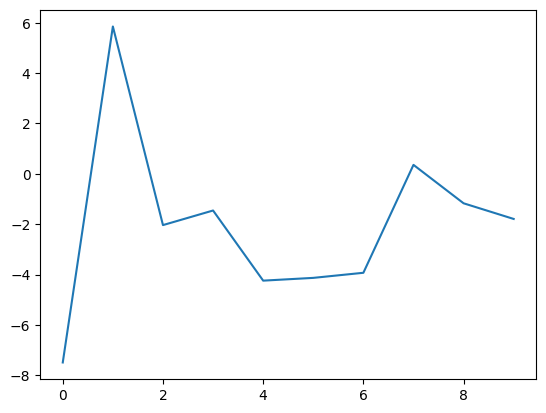

In [27]:
plt.plot(outputs[0].detach().numpy())

In [25]:
model

MLP(
  (hidden_layers): ModuleList(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): Sigmoid()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): Sigmoid()
  )
  (output_layer): Linear(in_features=64, out_features=10, bias=True)
)

In [33]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms

# Define the MLP model
class MLP(nn.Module):
    def __init__(self, hidden_sizes):
        super(MLP, self).__init__()
        self.hidden_layers = nn.ModuleList()
        input_size = 784  # 28x28 flattened MNIST images
        for hidden_size in hidden_sizes:
            self.hidden_layers.append(nn.Linear(input_size, hidden_size))
            self.hidden_layers.append(nn.ReLU())
            input_size = hidden_size
        self.output_layer = nn.Linear(input_size, 10)  # 10 classes for MNIST

    def forward(self, x):
        x = x.view(x.size(0), -1)  # Flatten the input
        for layer in self.hidden_layers:
            x = layer(x)
        return self.output_layer(x)

# Load MNIST dataset
train_dataset = datasets.MNIST(root='./data', train=True, transform=transforms.ToTensor(), download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transforms.ToTensor())
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)

# Create model and optimizer
model = MLP(hidden_sizes=[128, 64])
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)  # Learning rate scheduling

# Training loop
num_epochs = 20
best_accuracy = 0.0
for epoch in range(num_epochs):
    for images, labels in train_loader:
        # Forward pass
        outputs = model(images)
        loss = nn.CrossEntropyLoss()(outputs, labels)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Print gradients of model parameters
    for name, param in model.named_parameters():
        print(f"Gradient of {name}: {param.grad.norm():.4f}")

    # Evaluate on test set
    model.eval()
    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in test_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        accuracy = 100 * correct / total
        print(f"Epoch [{epoch+1}/{num_epochs}], Test Accuracy: {accuracy:.2f}%")

        # Save the best model checkpoint
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            torch.save(model.state_dict(), 'best_model.pth')

    model.train()
    scheduler.step()  # Update learning rate

Gradient of hidden_layers.0.weight: 1.1259
Gradient of hidden_layers.0.bias: 0.1311
Gradient of hidden_layers.2.weight: 0.6442
Gradient of hidden_layers.2.bias: 0.0857
Gradient of output_layer.weight: 0.6157
Gradient of output_layer.bias: 0.0547
Epoch [1/20], Test Accuracy: 93.04%
Gradient of hidden_layers.0.weight: 0.7311
Gradient of hidden_layers.0.bias: 0.0759
Gradient of hidden_layers.2.weight: 0.4149
Gradient of hidden_layers.2.bias: 0.0590
Gradient of output_layer.weight: 0.2711
Gradient of output_layer.bias: 0.0283
Epoch [2/20], Test Accuracy: 95.31%
Gradient of hidden_layers.0.weight: 0.6397
Gradient of hidden_layers.0.bias: 0.0903
Gradient of hidden_layers.2.weight: 0.3568
Gradient of hidden_layers.2.bias: 0.0560
Gradient of output_layer.weight: 0.2874
Gradient of output_layer.bias: 0.0300
Epoch [3/20], Test Accuracy: 96.35%
Gradient of hidden_layers.0.weight: 0.3860
Gradient of hidden_layers.0.bias: 0.0463
Gradient of hidden_layers.2.weight: 0.1820
Gradient of hidden_layers.2